# Python / Bond Calculus integration

In [13]:
latex.add_to_preamble(r"\usepackage{amsmath}")
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield
        
sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

In [14]:
from lbuc.bondcalculus import *

In [18]:
m = BondModel("../../../bondwb/models/enzymeI.biocpi"); m

Running cmd: 'load "../../../bondwb/models/enzymeI.biocpi"' ...


In [19]:
p = BondProcess("Pi || [0.5 .. 0.6] E", m); p

BondProcess('Pi || [0.5 .. 0.6] E', <lbuc.bondcalculus.BondModel object at 0x7f19fb491400>)

In [20]:
s = p.as_system; s

Running cmd: 'savesage "Pi || [0.5 .. 0.6] E" "/tmp/bond-sage-script-ny3yaefs.py"' ...


System(R, (x0, x1, x2, x3), [1, 0, [0.59999999999999997 .. 0.70000000000000018], 0], (-1.?*x0*x2, 0.50000000000000000?*x3, -1.?*x0*x2 + 0.50000000000000000?*x3, 1.?*x0*x2 - 0.50000000000000000?*x3), varmap=bidict({'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3}))

In [21]:
r = s.reach(4); r.successful

True

/usr/lib64/python3.8/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


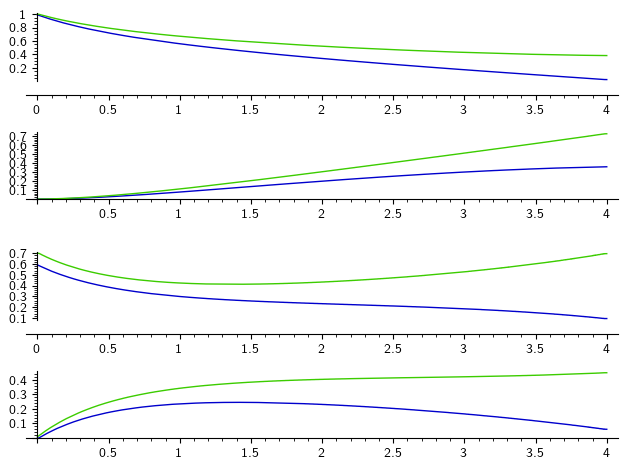

In [22]:
with suppress_stdout():
    res = graphics_array([r.sage_plot(x) for x in s.x], len(s.x), 1)
res

In [23]:
s.varmap

bidict({'S': x0, 'P': x1, 'E': x2, 'new 0 in p@0->P | x@0->E': x3})

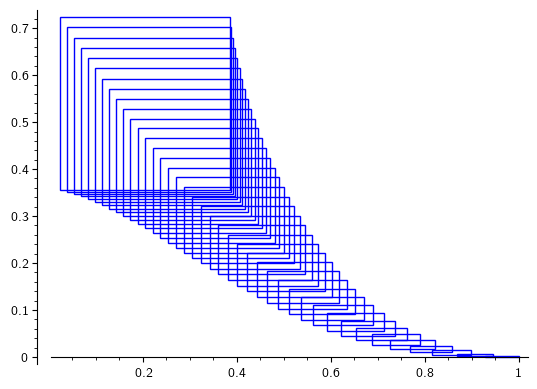

In [24]:
with suppress_stdout():
    res = r.sage_interval_plot('x0', 'x1')
res

In [25]:
r.wplot(b"x0", b"x1")

TypeError: Argument 'x' has incorrect type (expected str, got bytes)

In [ ]:
from lbuc.logic import *

In [ ]:
with suppress_stdout(): 
    sig = Atomic(s.v('S') - 0.7).signal_for_system(s, 4)
sig.plot()

In [ ]:
s

In [ ]:
sigC = G(RIF(0,0.2), "[0 .. 10] E" >> Atomic(var('S') - 0.7)).signal_for_system(s, 4)
sigC

In [ ]:
sigC.plot()